In [1]:
# import the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

In [2]:
# read the CSV file
data = pd.read_csv(r"C:\Users\Ashish Kulkarni\Desktop\Data Science\Practice\Pfizer Tweet Sentiment Analysis\vaccination_tweets.csv")
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [3]:
data.shape

(4975, 16)

In [4]:
data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [5]:
print('no. of unique users:', len(data['user_name'].unique()))

no. of unique users: 3348


In [6]:
data['id'].isnull().sum()

0

In [7]:
data['text'].isnull().sum()

0

In [8]:
data2 = data.iloc[:,:]

In [9]:
data = data[['id', 'text']]
data.head()

,id,text
0,1340539111971516416,Same folks said daikon paste could treat a cyt...
1,1338158543359250433,While the world has been on the wrong side of ...
2,1337858199140118533,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,1337855739918835717,"Facts are immutable, Senator, even when you're..."
4,1337854064604966912,Explain to me again why we need a vaccine @Bor...


In [10]:
# Cleaning the tweets
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [11]:
data['text'] = data['text'].apply(cleanUpTweet)

C:\Users\Ashish Kulkarni\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
# create a function to know the subjectivity and polarity of the text
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [13]:
data['Subjectivity'] = data['text'].apply(getTextSubjectivity)
data['Polarity'] = data['text'].apply(getTextPolarity)

C:\Users\Ashish Kulkarni\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ashish Kulkarni\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
data.head()

,id,text,Subjectivity,Polarity
0,1340539111971516416,Same folks said daikon paste could treat a cyt...,0.125000,0.00
1,1338158543359250433,While the world has been on the wrong side of ...,0.900000,-0.50
2,1337858199140118533,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.00
3,1337855739918835717,"Facts are immutable, Senator, even when you're...",0.550000,-0.05
4,1337854064604966912,Explain to me again why we need a vaccine wh...,0.000000,0.00


In [15]:
# create a function to know negative, neutral and positive sentiment
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [16]:
data['Sentiment'] = data['Polarity'].apply(getTextAnalysis)

C:\Users\Ashish Kulkarni\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
data.head()

,id,text,Subjectivity,Polarity,Sentiment
0,1340539111971516416,Same folks said daikon paste could treat a cyt...,0.125000,0.00,Neutral
1,1338158543359250433,While the world has been on the wrong side of ...,0.900000,-0.50,Negative
2,1337858199140118533,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.00,Neutral
3,1337855739918835717,"Facts are immutable, Senator, even when you're...",0.550000,-0.05,Negative
4,1337854064604966912,Explain to me again why we need a vaccine wh...,0.000000,0.00,Neutral


In [18]:
data['Sentiment'].value_counts()

Neutral     2289
Positive    2165
Negative     521
Name: Sentiment, dtype: int64

<BarContainer object of 3 artists>

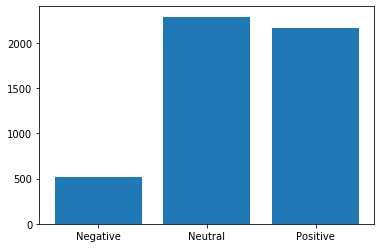

In [19]:
labels = data.groupby('Sentiment').count().index.values

values = data.groupby('Sentiment').size().values

plt.bar(labels, values)

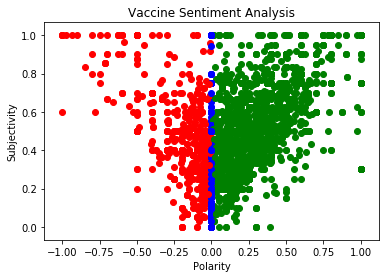

In [20]:
for index, row in data.iterrows():
    if row['Sentiment'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Sentiment'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Sentiment'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Vaccine Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [21]:
data2.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [22]:
temp1 = data2[['id', 'user_location', 'user_created', 'user_followers', 'user_friends', 'user_verified', 'date', 'hashtags', 
               'source', 'retweets', 'is_retweet']]
temp1.head()

,id,user_location,user_created,user_followers,user_friends,user_verified,date,hashtags,source,retweets,is_retweet
0,1340539111971516416,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,False,2020-12-20 06:06:44,['PfizerBioNTech'],Twitter for Android,0,False
1,1338158543359250433,"San Francisco, CA",2009-09-21 15:27:30,834,666,False,2020-12-13 16:27:13,NaN,Twitter Web App,1,False
2,1337858199140118533,Your Bed,2020-06-25 23:30:28,10,88,False,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,False
3,1337855739918835717,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,True,2020-12-12 20:23:59,NaN,Twitter Web App,446,False
4,1337854064604966912,NaN,2020-04-23 17:58:42,152,580,False,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,False


In [23]:
data_for_influence = data.merge(temp1, how='left', on='id')
data_for_influence.head()

,id,text,Subjectivity,Polarity,Sentiment,user_location,user_created,user_followers,user_friends,user_verified,date,hashtags,source,retweets,is_retweet
0,1340539111971516416,Same folks said daikon paste could treat a cyt...,0.125000,0.00,Neutral,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,False,2020-12-20 06:06:44,['PfizerBioNTech'],Twitter for Android,0,False
1,1338158543359250433,While the world has been on the wrong side of ...,0.900000,-0.50,Negative,"San Francisco, CA",2009-09-21 15:27:30,834,666,False,2020-12-13 16:27:13,NaN,Twitter Web App,1,False
2,1337858199140118533,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.00,Neutral,Your Bed,2020-06-25 23:30:28,10,88,False,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,False
3,1337855739918835717,"Facts are immutable, Senator, even when you're...",0.550000,-0.05,Negative,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,True,2020-12-12 20:23:59,NaN,Twitter Web App,446,False
4,1337854064604966912,Explain to me again why we need a vaccine wh...,0.000000,0.00,Neutral,NaN,2020-04-23 17:58:42,152,580,False,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,False


In [24]:
positive_tweets = data[data['Sentiment'] == 'Positive']

print(str(positive_tweets.shape[0]/(data.shape[0])*100) + " % of positive tweets")

43.517587939698494 % of positive tweets


In [25]:
negative_tweets = data[data['Sentiment'] == 'Negative']

print(str(negative_tweets.shape[0]/(data.shape[0])*100) + " % of negative tweets")

10.472361809045227 % of negative tweets


In [26]:
neutral_tweets = data[data['Sentiment'] == 'Neutral']

print(str(neutral_tweets.shape[0]/(data.shape[0])*100) + " % of neutral tweets")

46.01005025125628 % of neutral tweets
